# Módulo 5 


### 1. Ricardo Villareal Bazán // A01666859
### 2. Bertin Flores Silva// A01660604

In [63]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


df_resumen = pd.read_excel("data/CR EJEMPLO MOD.xlsx", sheet_name="Data")
#df_detalle = pd.read_excel("pf excel.xlsx", sheet_name="Sheet2")
df_resumen.columns.values


c:\Users\ultim\anaconda3\envs\IDM\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


array(['CONTROL', '# CHEQUE', 'PARTIDA PRESUPUESTAL', 'UIDD/FOLIO FISCAL',
       'DIRECCION', 'REGIMEN FISCAL', 'NOMBRE REGIMEN FISCAL', 'RFC',
       'STATUS', 'FECHA DE RECIBIDO', 'SEMANA QUE SE PAGA', 'TIPO',
       'NOMBRE DEL PROVEEDOR', 'CORREO', 'CONCEPTO', 'TIPO2', 'SUBTOTAL',
       'IVA', 'OTROS IMPUESTOS', 'RET IVA', 'RET ISR', 'TOTAL',
       'CUENTA CLAVE', 'BANCO', 'ESTATUS', 'FECHA DE PAGO ', 'NOTAS',
       'Valida', 'MES', 'Column1', 'SUBTOTAL2', 'IVA3', 'RET IVA4',
       'RET ISR.1', 'TOTAL.1', 'CAMBIOS', 'Unnamed: 36'], dtype=object)

### LIMPIEZA DE DATOS

In [ ]:
# Eliminar filas vacías o irrelevantes en df_resumen
df_resumen = df_resumen.dropna(subset=["TIPO", "Valida", "TIPO","TOTAL","FECHA DE PAGO "], how='all')
#df_resumen = df_resumen[~df_resumen["DEPARTAMENTO"].str.contains("Subtotal|Total", na=False)]

# Asegurar que los datos numéricos estén en el formato correcto
df_numeros = df_resumen[pd.to_numeric(df_resumen['FECHA DE PAGO '], errors='coerce').notna()]
df_numeros.loc[df_numeros["FECHA DE PAGO "] != -45168, :]
#df_resumen["PRESUPUESTO"] = pd.to_numeric(df_resumen["PRESUPUESTO"], errors="coerce")
#df_resumen["GASTO"] = pd.to_numeric(df_resumen["GASTO"], errors="coerce")
# Convertir fechas en df_detalle
#df_detalle["FECHA"] = pd.to_datetime(df_detalle["FECHA"])

#display(df_detalle)
display(df_numeros)

,CONTROL,# CHEQUE,PARTIDA PRESUPUESTAL,UIDD/FOLIO FISCAL,DIRECCION,REGIMEN FISCAL,NOMBRE REGIMEN FISCAL,RFC,STATUS,FECHA DE RECIBIDO,...,Valida,MES,Column1,SUBTOTAL2,IVA3,RET IVA4,RET ISR.1,TOTAL.1,CAMBIOS,Unnamed: 36
0,NaN,NaN,Income (Funding),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Income (Funding) IVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F1.2,NaN,Income (Funding),NaN,NaN,Estados Unidos (los),Estados Unidos (los),0.0,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N001,0001,7007-009,0.0,86127,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,1.0,NaN,33.0,...,7007-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45135.0
4,N003,0004,1107-009,1.0,4318,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,2.0,NaN,40.0,...,1107-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6762,T13,-,Impuestos Pagados (IVA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6763,T13.1,-,Impuestos Pagados (ISR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7337,NaN,NaN,DEV IVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7338,NaN,NaN,DEV IVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Resumen general
print(df_numeros.describe())
#print(df_detalle.describe())

# Departamentos únicos
print(df_numeros["FECHA DE PAGO "].unique())
#print(df_detalle["DEPARTAMENTO"].unique())


       UIDD/FOLIO FISCAL          RFC  FECHA DE RECIBIDO  \
count        6233.000000  5742.000000         990.000000   
mean         2102.756618   280.222745         247.435837   
std          1306.970398   282.846292          72.615092   
min             0.000000     0.000000        -190.000000   
25%           782.000000    37.000000         204.498264   
50%          2054.000000   172.000000         260.782975   
75%          3249.000000   454.000000         282.861490   
max          4611.000000  1118.000000         467.694468   

       NOMBRE DEL PROVEEDOR       CORREO     CONCEPTO      SUBTOTAL  \
count           6372.000000  6040.000000  6375.000000  6.381000e+03   
mean             484.481481    37.346523  2052.081569  4.745918e+04   
std              404.641606    60.403467  1247.523366  7.307709e+05   
min                0.000000     0.000000     0.000000 -5.674003e+05   
25%              149.000000     1.000000   974.000000  5.163800e+02   
50%              343.000000    17

## Gasto vs Presupuesto

In [66]:
df_melted = df_resumen.melt(id_vars="DEPARTAMENTO", value_vars=["PRESUPUESTO", "GASTO"],
                            var_name="Tipo", value_name="Monto")

# Gráfico interactivo
fig = px.bar(df_melted, x="DEPARTAMENTO", y="Monto", color="Tipo", barmode="group",
             title="Presupuesto vs Gasto por Departamento")

fig.update_layout(xaxis_title="Departamento", yaxis_title="Monto", xaxis_tickangle=-45)
fig.show()

1. Departamentos con mayor presupuesto asignado: 

- Total, Subtotales, y algunos bloques técnicos como Recursos Técnicos o Eq. Guión y Adaptativo destacan con montos de presupuesto mucho más altos que otros departamentos.

- Estas categorías parecen funcionar como agrupaciones globales, lo cual puede inflar la escala visual si se comparan directamente con unidades pequeñas.

2. Departamentos con mayor gasto ejecutado:

- Algunos departamentos como Arte y Diseño, Eq. Escenografía, y Dirección muestran un gasto real considerable, cercano a su presupuesto.

- Esto sugiere que son áreas clave en la producción y tienen una alta participación en el uso de recursos.

## Porcentaje del gasto por unidad específica (UNIDAD ESP.) dentro de cada departamento

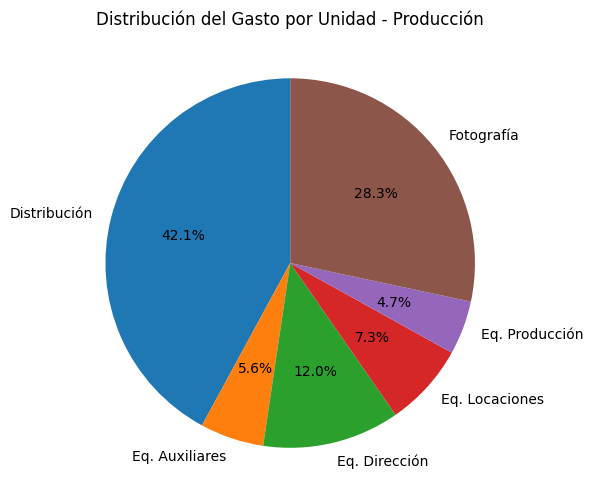

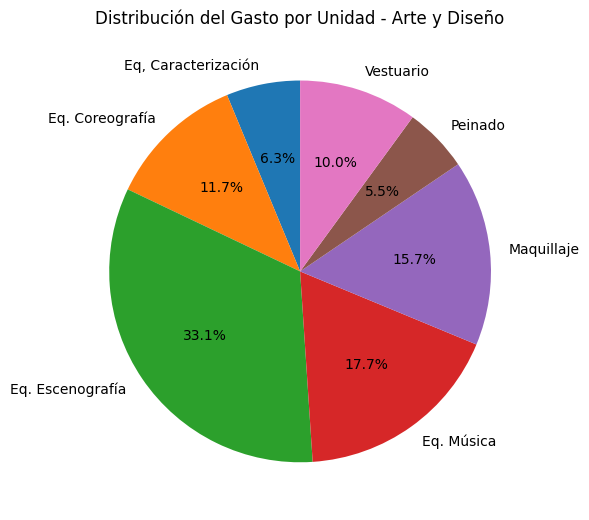

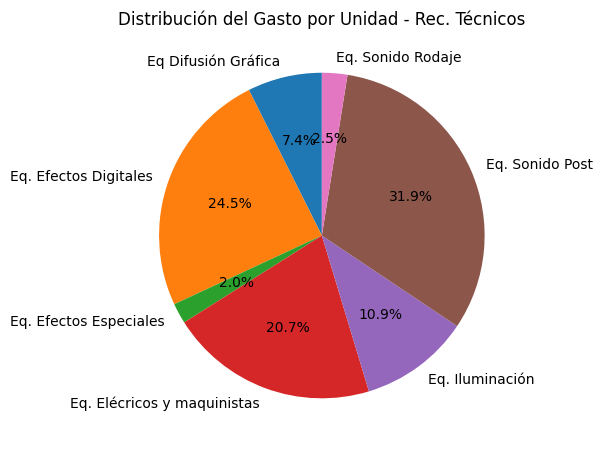

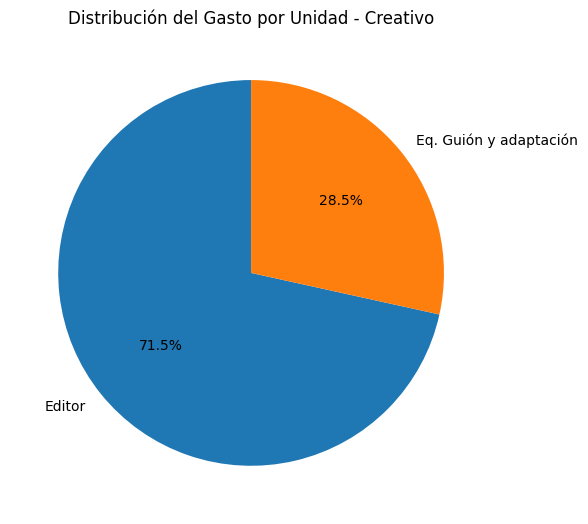

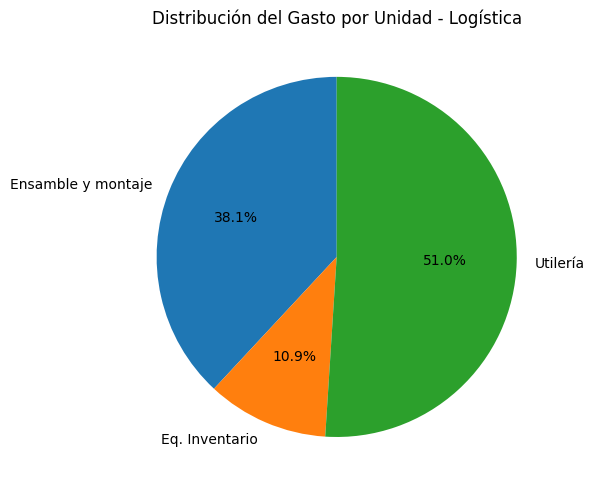

5

In [69]:
# Obtener los departamentos únicos
departamentos = df_detalle["DEPARTAMENTO"].unique()

# Crear un gráfico de pastel por cada departamento
num_departamentos = len(departamentos)
fig_count = 0

for dept in departamentos:
    unidades = df_detalle[df_detalle["DEPARTAMENTO"] == dept].groupby("UNIDAD ESP.")["GASTO"].sum()
    
    # Solo graficar si hay más de una unidad
    if len(unidades) > 1:
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.pie(unidades, labels=unidades.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Distribución del Gasto por Unidad - {dept}')
        plt.tight_layout()
        plt.show()
        fig_count += 1

fig_count


### Hipótesis: "Los departamentos con mayor presupuesto tienen un mayor gasto acumulado"

Correlación entre presupuesto y gasto:  0.4207121801725367


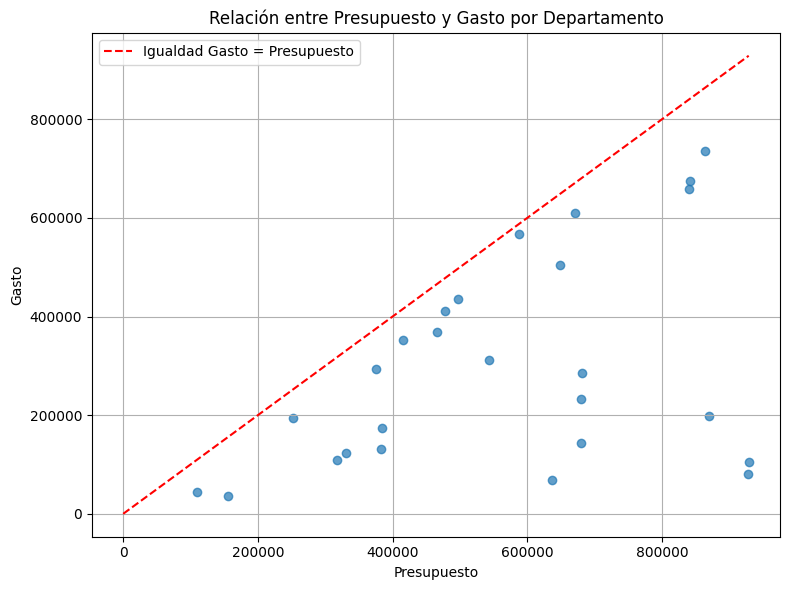

In [67]:
# Calcular la correlación de Pearson entre Presupuesto y Gasto
correlation = df_resumen["PRESUPUESTO"].corr(df_resumen["GASTO"])
print("Correlación entre presupuesto y gasto: ", correlation)

# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(8, 6))
plt.scatter(df_resumen["PRESUPUESTO"], df_resumen["GASTO"], alpha=0.7)
plt.title("Relación entre Presupuesto y Gasto por Departamento")
plt.xlabel("Presupuesto")
plt.ylabel("Gasto")
plt.grid(True)

# Añadir línea de referencia 1:1 para comparar igualdad
max_val = max(df_resumen["PRESUPUESTO"].max(), df_resumen["GASTO"].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Igualdad Gasto = Presupuesto')
plt.legend()

plt.tight_layout()
plt.show()

La correlación entre el presupuesto y el gasto es de aproximadamente 0.42.

Esto indica una correlación moderada y positiva: en general, los departamentos con mayor presupuesto tienden a gastar más, aunque no es una relación muy fuerte. Hay cierta dispersión que sugiere que otros factores podrían influir en el gasto real.



### Hipótesis 2: "Producción y Arte y Diseño son los departamentos con mayor variabilidad en el gasto por unidad específica"

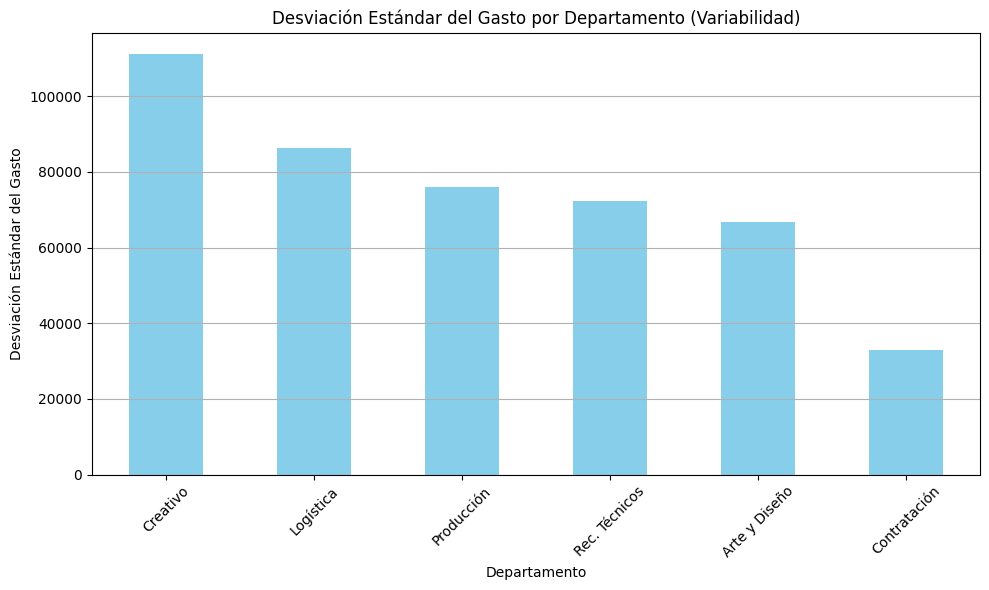

In [68]:
# Agrupar por departamento y calcular la desviación estándar del gasto
std_gasto_por_departamento = df_detalle.groupby("DEPARTAMENTO")["GASTO"].std().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
std_gasto_por_departamento.plot(kind='bar', color='skyblue')
plt.title("Desviación Estándar del Gasto por Departamento (Variabilidad)")
plt.xlabel("Departamento")
plt.ylabel("Desviación Estándar del Gasto")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

- Se confirma que Producción y Arte y Diseño están entre los departamentos con mayor variabilidad, lo que respalda parcialmente la hipótesis.

- Cuanto mayor la barra, mayor la dispersión de los montos de gasto entre sus unidades específicas.

- Alta desviación estándar = el gasto no es consistente entre las unidades.

- Baja desviación estándar = el gasto es similar entre todas las unidades.

Sí, la hipótesis se confirma. Ambos departamentos presentan una de las mayores variabilidades en el gasto, lo cual puede ser indicio de gestión descentralizada o necesidades muy distintas entre sus unidades.





### Hipótesis 3: "La mayoría del gasto ocurre durante el mes de noviembre."

In [71]:
# Asegurar formato de fecha y extraer el nombre del mes
df_detalle["FECHA"] = pd.to_datetime(df_detalle["FECHA"], errors="coerce")
df_detalle["MES"] = df_detalle["FECHA"].dt.month_name()

# Agrupar gasto por mes
gasto_mensual = df_detalle.groupby("MES")["GASTO"].sum().reset_index()
gasto_mensual = gasto_mensual.sort_values("GASTO", ascending=False)

# Gráfico de barras interactivo
fig = px.bar(
    gasto_mensual,
    x="MES",
    y="GASTO",
    title="Gasto Total por Mes",
    labels={"GASTO": "Gasto Total", "MES": "Mes"},
    color="GASTO"
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

Noviembre no es el mes con mayor gasto. Diciembre ocupa ese lugar con más del doble del gasto de noviembre.